## These Notes were obtained from Tirthajyoti Sarkar [Notes on Statistics and Math with Python](https://github.com/tirthajyoti/Stats-Maths-with-Python/blob/master/Computing_pi_throwing_dart.ipynb)

In [1]:
from math import pi,sqrt
import random
import matplotlib.pyplot as plt
import numpy as np

## The number _pi_ ($\pi$)
The number $\pi$ is a mathematical constant. Originally defined as the ratio of a circle's circumference to its diameter, it now has various equivalent definitions and appears in many formulas in all areas of mathematics and physics. It is approximately equal to 3.14159. It has been represented by the Greek letter __"$\pi$"__ since the mid-18th century, though it is also sometimes spelled out as "pi". It is also called Archimedes' constant.

Being an irrational number, $\pi$ cannot be expressed as a common fraction (equivalently, its decimal representation never ends and never settles into a permanently repeating pattern). 

### What is the value of $\pi$

In [2]:
print("Value of pi: ",pi)

Value of pi:  3.141592653589793


## What is the logic behind computing pi by throwing dart randomly?
Imagine a square dartboard.

Then, the dartboard with a circle drawn inside it touching all its sides.

And then, you throw darts at it. Randomly. That means some fall inside the circle, some outside. But assume that no dart falls outside the board.

![boards](https://raw.githubusercontent.com/tirthajyoti/Stats-Maths-with-Python/master/images/boards.png)

At the end of your dart throwing session, you count the fraction of darts that fell inside the circle of the total number of darts thrown. Multiply that number by 4.

The resulting number should be pi. Or, a close approximation if you had thrown a lot of darts.

The idea is extremely simple. If you throw a large number of darts, then the **probability of a dart falling inside the circle is just the ratio of the area of the circle to that of the area of the square board**. With the help of basic mathematics, you can show that this ratio turns out to be pi/4. So, to get pi, you just multiply that number by 4.

The key here is to simulate the throwing of a lot of darts so as to make the fraction equal to the probability, an assertion valid only in the limit of a large number of trials of this random event. This comes from the [law of large number](https://en.wikipedia.org/wiki/Law_of_large_numbers) or the [frequentist definition of probability](https://en.wikipedia.org/wiki/Frequentist_probability).

See also the concept of [Buffon's Needle](https://en.wikipedia.org/wiki/Buffon%27s_needle_problem)

### Center point and the side of the square

In [3]:
# Center point
x,y = 0,0
# Side of the square
a = 2

### Function to simulate a random throw of a dart aiming at the square

In [4]:
def throw_dart():
    """
    Simulates the randon throw of a dirt. It can land anywhere in the square (uniformly randomly)
    """
    # Random final landing position of the dirt between -a/2 and +a/2 around the center point
    position_x = x+a/2*(-1+2*random.random())
    position_y = y+a/2*(-1+2*random.random())
    
    return (position_x,position_y)

In [6]:
throw_dart()

(0.7644027981492474, -0.56192744653297)

### Function to determine if the dart landed inside the circle

In [7]:
def is_within_circle(x,y):
    """
    Given the landing coordinate of a dirt, determines if it fell inside the circle
    """
    # Side of the square
    a = 2
    
    distance_from_center = sqrt(x**2+y**2)
    
    if distance_from_center < a/2:
        return True
    else:
        return False

In [8]:
is_within_circle(1.9,1.9)

False

In [9]:
is_within_circle(1.2,1.9)

False

In [10]:
is_within_circle(0.4,-0.74)

True

In [11]:
r1,r2=throw_dart()
print(r1,r2)
if is_within_circle(r1,r2):
    print("This one landed inside the circle!")
else:
    print("This one did not land inside the circle!")

0.8694702684082585 -0.7449316481215551
This one did not land inside the circle!


### Now throw a few darts!

In [12]:
n_throws = 10

In [13]:
count_inside_circle=0

In [14]:
for i in range(n_throws):
    r1,r2=throw_dart()
    if is_within_circle(r1,r2):
        count_inside_circle+=1

### Compute the ratio of `count_inside_circle` and `n_throws`

In [15]:
ratio = count_inside_circle/n_throws

### Is it approximately equal to $\pi$?

In [16]:
print(4*ratio)

3.6


### Not exactly. Let's try with a lot more darts!

In [34]:
n_throws = 100_000
count_inside_circle=0

In [35]:
for i in range(n_throws):
    r1,r2=throw_dart()
    if is_within_circle(r1,r2):
        count_inside_circle+=1

In [36]:
ratio = count_inside_circle/n_throws

In [37]:
print(4*ratio)

3.147


### Now we are approaching $\pi$ :-). Let's functionalize this process and run a number of times

In [38]:
def compute_pi_throwing_dart(n_throws):
    """
    Computes pi by throwing a bunch of darts at the square
    """
    n_throws = n_throws
    count_inside_circle=0
    for i in range(n_throws):
        r1,r2=throw_dart()
        if is_within_circle(r1,r2):
            count_inside_circle+=1
            
    result = 4*(count_inside_circle/n_throws)
    
    return result

### Now let us run this experiment a few times and see what happens.

In [39]:
n_exp=[]
pi_exp=[]
n = [int(10**(0.5*i)) for i in range(1,15)]
for i in n:
    p = compute_pi_throwing_dart(i)
    pi_exp.append(p)
    n_exp.append(i)
    print("Computed value of pi by throwing {} darts is: {}".format(i,p))

Computed value of pi by throwing 3 darts is: 4.0
Computed value of pi by throwing 10 darts is: 3.2
Computed value of pi by throwing 31 darts is: 2.967741935483871
Computed value of pi by throwing 100 darts is: 3.36
Computed value of pi by throwing 316 darts is: 3.1265822784810124
Computed value of pi by throwing 1000 darts is: 3.16
Computed value of pi by throwing 3162 darts is: 3.1688804554079697
Computed value of pi by throwing 10000 darts is: 3.1368
Computed value of pi by throwing 31622 darts is: 3.1300992979571185
Computed value of pi by throwing 100000 darts is: 3.13212
Computed value of pi by throwing 316227 darts is: 3.141730465773005
Computed value of pi by throwing 1000000 darts is: 3.142024
Computed value of pi by throwing 3162277 darts is: 3.1426506912582295
Computed value of pi by throwing 10000000 darts is: 3.141892


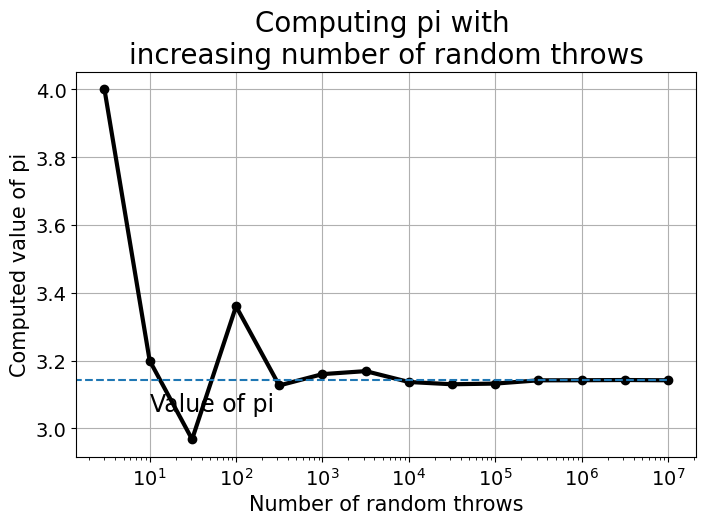

In [40]:
plt.figure(figsize=(8,5))
plt.title("Computing pi with \nincreasing number of random throws",fontsize=20)
plt.semilogx(n_exp, pi_exp,c='k',marker='o',lw=3)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel("Number of random throws",fontsize=15)
plt.ylabel("Computed value of pi",fontsize=15)
plt.hlines(y=3.14159,xmin=1,xmax=1e7,linestyle='--')
plt.text(x=10,y=3.05,s="Value of pi",fontsize=17)
plt.grid(True)
plt.show()

### So, effectively we can average a few experiments and take that value

In [41]:
n = 5000000
sum=0
for i in range(20):
    p=compute_pi_throwing_dart(n)
    sum+=p
    print("Experiment number {} done. Computed value: {}".format(i+1,p))
print("-"*75)
pi_computed = round(sum/20,4)
print("Average value from 20 experiments:",pi_computed)

Experiment number 1 done. Computed value: 3.1418992
Experiment number 2 done. Computed value: 3.1423512
Experiment number 3 done. Computed value: 3.142012
Experiment number 4 done. Computed value: 3.1428232
Experiment number 5 done. Computed value: 3.1417272
Experiment number 6 done. Computed value: 3.14228
Experiment number 7 done. Computed value: 3.1423552
Experiment number 8 done. Computed value: 3.14032
Experiment number 9 done. Computed value: 3.1417496
Experiment number 10 done. Computed value: 3.1420184
Experiment number 11 done. Computed value: 3.1409712
Experiment number 12 done. Computed value: 3.1397848
Experiment number 13 done. Computed value: 3.1424096
Experiment number 14 done. Computed value: 3.142296
Experiment number 15 done. Computed value: 3.1419872
Experiment number 16 done. Computed value: 3.1416248
Experiment number 17 done. Computed value: 3.1427448
Experiment number 18 done. Computed value: 3.1412624
Experiment number 19 done. Computed value: 3.1414696
Experime

### Error percentage can be easily computed

In [32]:
error_pct = 100*(pi - pi_computed)/pi
print("Error percentage: ", error_pct)

Error percentage:  -0.0034169423615242416
